In [2]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('qsar-biodeg.csv')
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,2
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,2
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,2
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,2
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,0,0,0,2,0,32.1,4,1,...,0,6,1,3.573,2.242,1,8.088,0,0,1
1051,5.287,3.3732,0,0,9,0,0,35.3,0,9,...,0,3,0,3.787,3.083,3,9.278,0,0,1
1052,4.869,1.7670,0,1,9,0,5,44.4,0,4,...,4,13,0,3.848,2.576,5,9.537,1,0,1
1053,5.158,1.6914,2,0,36,0,9,56.1,0,0,...,1,16,0,5.808,2.055,8,11.055,0,1,1


In [4]:
data.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
V31      0
V32      0
V33      0
V34      0
V35      0
V36      0
V37      0
V38      0
V39      0
V40      0
V41      0
Class    0
dtype: int64

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

In [7]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)

In [8]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [11]:
kmeans.inertia_

36579.76536085815

In [12]:
kmeans.cluster_centers_

array([[ 2.09276338e+00,  3.43119174e+00,  6.49956017e-01,
        -1.66689534e-01, -3.34539191e-01,  5.07172116e+00,
        -6.80427356e-01, -8.04033680e-01,  2.49855176e-01,
        -6.40780658e-01, -3.97087383e-01, -9.24052238e-01,
         1.12140177e+00, -1.91513033e-02,  1.55264055e+00,
        -6.50261316e-01,  4.95989532e+00,  5.05256905e+00,
        -8.38379952e-02, -2.32990542e-01,  6.59624594e+00,
        -2.13019832e+00, -2.65833985e-01,  1.37362537e-01,
        -2.28754541e-01, -1.56830220e-01,  1.25632323e+00,
        -7.76040667e-02, -1.65117762e-01, -5.73218389e-01,
         1.08093694e-01,  5.39883949e-03, -5.81289182e-01,
        -4.72908635e-01, -4.46617084e-01,  3.32049612e-01,
         3.85121065e+00, -5.68497366e-01,  7.15033920e-01,
        -1.60545149e-01,  5.63397857e+00, -7.13651875e-01],
       [ 5.93980113e-01, -2.00545162e-01,  4.44127995e-01,
         1.48916356e-01,  3.95616590e-01,  3.51671615e-02,
         7.57147885e-01,  6.46122344e-01, -6.10271284e-

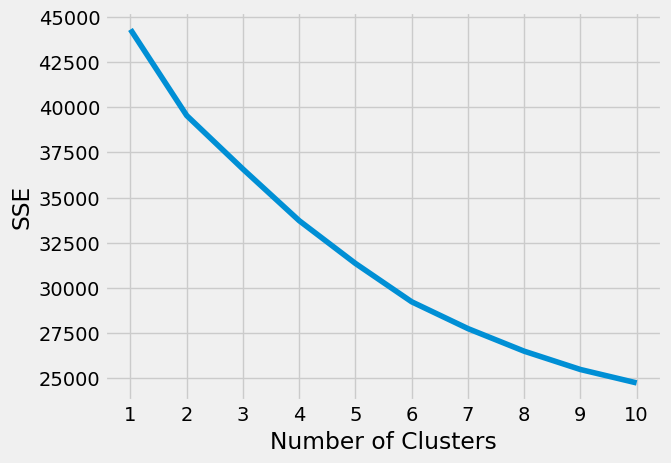

In [13]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [14]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

5

In [15]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

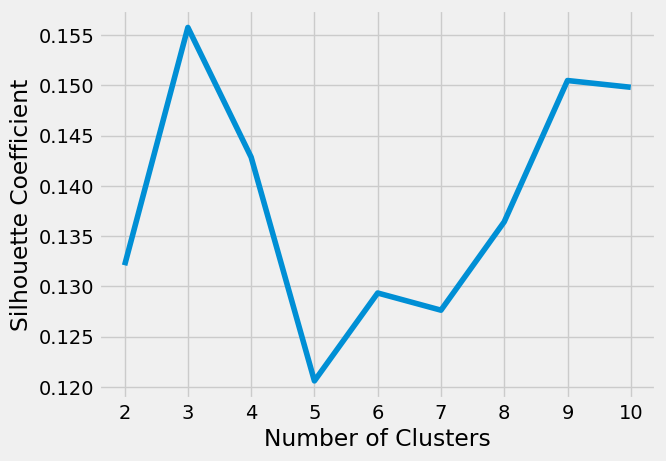

In [16]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [17]:
kmeans.n_iter_


31

In [18]:
features, true_labels = make_moons(
n_samples=250, noise=0.05, random_state=42)
scaled_features = scaler.fit_transform(features)

In [19]:
kmeans = KMeans(n_clusters=4)
dbscan = DBSCAN(eps=0.3)

In [20]:
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round (2)

c:\Users\Julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
kmeans_silhouette

0.44

In [22]:
dbscan_silhouette

0.38

In [23]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
round(ari_kmeans, 2)

0.29

In [24]:
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)
round(ari_dbscan, 2)

1.0

c:\Users\Julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


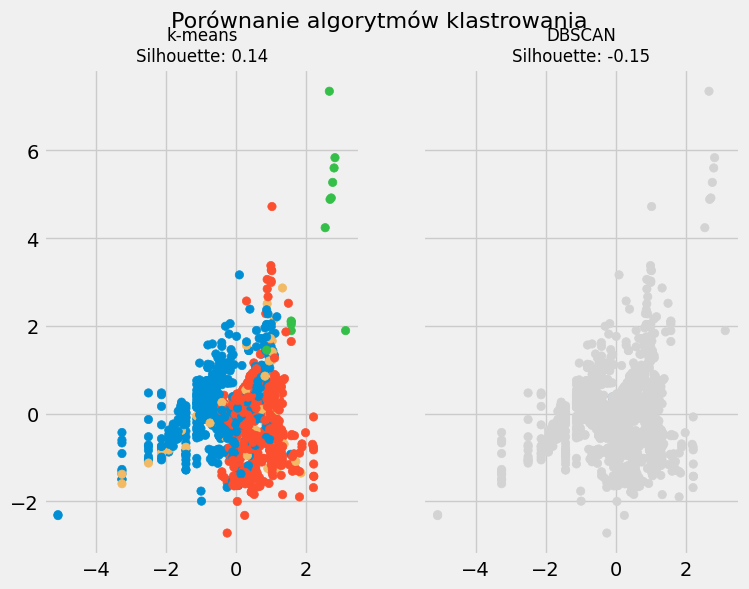

In [25]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Załaduj swoje dane
data = pd.read_csv('qsar-biodeg.csv')  # Zmień na właściwą ścieżkę do pliku

# Sprawdzenie i usunięcie nagłówków/etykiet, jeśli są w pierwszym wierszu
data = data[1:] if data.iloc[0].dtype == 'object' else data

# Konwersja wszystkich kolumn na typ numeryczny
data = data.apply(pd.to_numeric, errors='coerce')

# Usunięcie wierszy, które zawierają NaN po konwersji
data = data.dropna()

# Skalowanie cech
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

# Tworzenie modelu KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)

# Tworzenie modelu DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(scaled_features)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_, metric='euclidean').round(2)

# Color mapping dla różnych klastrów
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
    2: "#34bf49",  # Kolor dla klastra 2
    3: "#f2ba64"   # Kolor dla klastra 3
}

# Tworzenie wykresów
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle("Porównanie algorytmów klastrowania", fontsize=16)

# Wykres KMeans
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

# Wykres DBSCAN
db_colors = [fte_colors[label] if label != -1 else "#d3d3d3" for label in dbscan.labels_]  # Szary dla punktów szumu
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})

plt.show()


c:\Users\Julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans Silhouette Score:  0.1389601391841489
KMeans Davies-Bouldin Score:  1.8104696365485915
DBSCAN Silhouette Score:  -0.14994500511632794
DBSCAN Davies-Bouldin Score:  1.3864979479036752


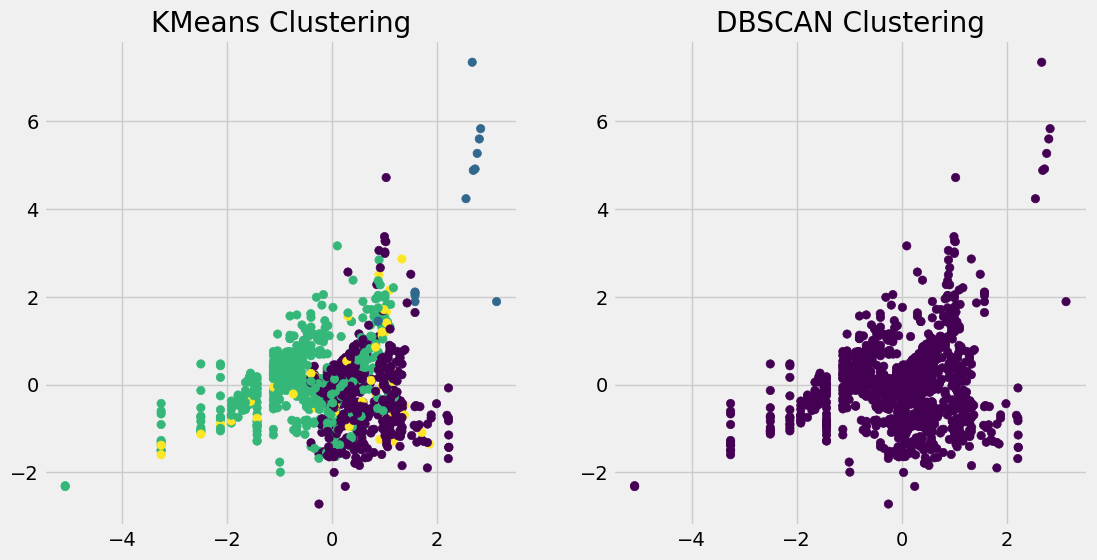

In [26]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Wczytaj dane
data_path = 'qsar-biodeg.csv'  # Zmień na właściwą ścieżkę do pliku
data = pd.read_csv(data_path)

# Usunięcie kolumny 'Class', która zawiera etykiety
data_no_class = data.drop('Class', axis=1)

# Skalowanie danych
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_no_class)

# Klastrowanie przy użyciu KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)
kmeans_labels = kmeans.labels_
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(scaled_features, kmeans_labels)

# Klastrowanie przy użyciu DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(scaled_features)
dbscan_labels = dbscan.labels_
dbscan_silhouette = silhouette_score(scaled_features, dbscan_labels)
dbscan_davies_bouldin = davies_bouldin_score(scaled_features, dbscan_labels)

# Wyniki
print("KMeans Silhouette Score: ", kmeans_silhouette)
print("KMeans Davies-Bouldin Score: ", kmeans_davies_bouldin)
print("DBSCAN Silhouette Score: ", dbscan_silhouette)
print("DBSCAN Davies-Bouldin Score: ", dbscan_davies_bouldin)

# Wizualizacja wyników klastrowania przy użyciu KMeans
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')

# Wizualizacja wyników klastrowania przy użyciu DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.show()

